Salaries -Polynomial Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/home/student/Downloads/Position_Salaries.xls')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
df.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

In [5]:
df.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [9]:
x=df.iloc[:,1:-1].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [10]:
y=df.iloc[:,-1].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
y_pred

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

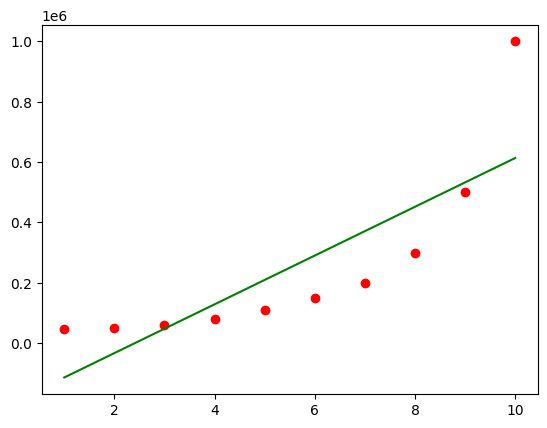

In [12]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='red')
plt.plot(x,y_pred,color='green')

In [13]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
print('error:',mean_absolute_error(y,y_pred))
print('error percentage:',mean_absolute_percentage_error(y,y_pred))
print('mse:',mean_squared_error(y,y_pred))

error: 128454.54545454546
error percentage: 0.9673763085399448
mse: 26695878787.878784


In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)
x_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [15]:
poly.fit(x_poly,y)
reg=LinearRegression()
reg.fit(x_poly,y)
y_poly=reg.predict(x_poly)
y_poly

array([ 14902.09790211,  78759.90675991,  94960.37296037,  88223.77622378,
        83270.3962704 , 104820.51282052, 177594.40559441, 326312.35431236,
       575694.63869463, 950461.53846152])

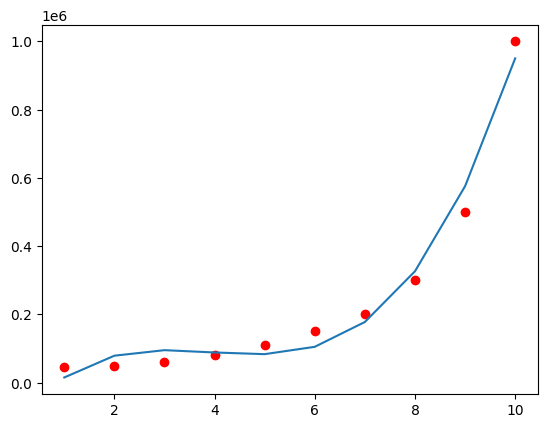

In [16]:
plt.scatter(x,y, color="red")
plt.plot(x,y_poly)

In [17]:
df1=pd.DataFrame({'Actual values':y,'simple regression Predicted value':y_pred,'Polynomial regression predicted value':y_poly})
df1

,Actual values,simple regression Predicted value,Polynomial regression predicted value
0,45000,-114454.545455,14902.097902
1,50000,-33575.757576,78759.906760
2,60000,47303.030303,94960.372960
3,80000,128181.818182,88223.776224
4,110000,209060.606061,83270.396270
5,150000,289939.393939,104820.512821
6,200000,370818.181818,177594.405594
7,300000,451696.969697,326312.354312
8,500000,532575.757576,575694.638695
9,1000000,613454.545455,950461.538462


In [18]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
print('error:',mean_absolute_error(y,y_poly))
print('error percentage:',mean_absolute_percentage_error(y,y_poly))
print('mse:',mean_squared_error(y,y_poly))

error: 34790.20979020961
error percentage: 0.28743670269122285
mse: 1515662004.6620114


In [19]:
from sklearn.metrics import r2_score
print('simple LR r2_score:',r2_score(y,y_pred))
print('polynomial LR r2_score:',r2_score(y,y_poly))

simple LR r2_score: 0.6690412331929895
polynomial LR r2_score: 0.9812097727913366
